## Import Analysis: Beers to Ecuador (2017 - 2022)
### Questions to answer:
- What has been the trend of beer imports in Ecuador since 2017?
- Is more beer been imported troughout the years or is it getting more expensive to import beer to Ecuador?
- What has been happening with freight costs?
- Which is the leading company in beer importation?
- Which import do Ecuadorians import the most (USD)?
- Where do beers come from?

In [1]:
# import libraries:
import pandas as pd 
import os 
import matplotlib.pyplot as plt

In [2]:
# set directory:
os.chdir("/Users/carlosswanton/Desktop/Proyecto - Py/Cleaned_data/")

In [3]:
# import cleaned data: 
df = pd.read_excel("cheers.xlsx", index_col = 0)

In [4]:
# check the date range of data: 
filt = (df["año"] == 2022)
current = df.loc[filt]
current["mes"].value_counts()

6    332
5    284
3    207
8    196
4    191
7    190
1    144
2    142
9      6
Name: mes, dtype: int64

- Our data was downloaded in Sep of 2022. Therefore, we do not have complete data for 2022. 
- In order to make a correct data analysis, I will be analyzing how beer imports did during the first 8 months of each year. 

In [5]:
# keep months from Jan to Aug:
months_to_keep = [x + 1 for x in range(0,8)]
months_to_keep

[1, 2, 3, 4, 5, 6, 7, 8]

In [6]:
# create a new dataframe for the first 8 months of each year: 
filt = (df["mes"].isin(months_to_keep))
cheers = df.loc[filt]
cheers.shape

(5766, 16)

### What has been the trend of beer imports in Ecuador since 2017? 

In [7]:
# renaming columns to english:
cheers.rename(columns = {"año": "year", "mes" : "month", "ruc" : "id", "razon_social" : "company", "marcas" : "brand", "pais_embarque" : "shipping_country", 
                       "pais_origen" : "country_origin", "unidades" : "units", "tipo_unidad" : "unit_type", "kilos_neto" : "weight_kilos", 
                      "flete" : "shipping_price", "seguro" : "insurance", "fob_unitario": "fob_unit"}, inplace = True)

/Users/carlosswanton/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
# grouping by; to look at imports per year:
year = cheers.groupby("year")

In [9]:
year["cif"].sum().round(2)

year
2017     3787732.24
2018     6849889.15
2019    11991115.10
2020    10667763.48
2021    16489189.49
2022    24095378.32
Name: cif, dtype: float64

In [10]:
# imports in USD Millions:
imports_per_year = year["cif"].sum().round(2) / 1000000

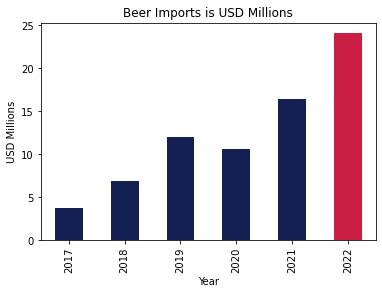

In [11]:
# bar chart:
imports_per_year.plot(kind = "bar", title = "Beer Imports is USD Millions", color = ["#141F52", "#141F52","#141F52","#141F52","#141F52","#C91D42"], ylabel = "USD Millions",
                     xlabel = "Year")
plt.savefig("evolution.png", dpi=300, bbox_inches='tight')

- Since data is available, 2022 has been the year with the highest dollar amount in beer imports. 
- In the first 8 months of 2022, Ecuador imported $24 million in beers.

<AxesSubplot:title={'center':'Year on Year Growth (USD)'}, xlabel='Year', ylabel='Yearly Growth'>

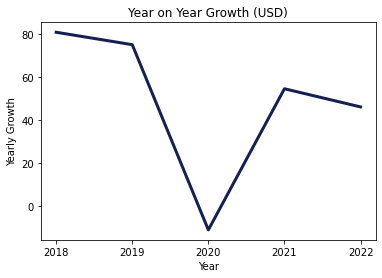

In [12]:
# Year on year growth of beer imports:
growth_cif = imports_per_year.pct_change() * 100
growth_cif = growth_cif.round(2)
growth_cif.plot(xlabel = "Year", ylabel = "Yearly Growth", color = "#141F52", title = "Year on Year Growth (USD)",
               xticks = [2018,2019,2020,2021,2022], linewidth= 3)

In [13]:
growth_cif

year
2017      NaN
2018    80.84
2019    75.06
2020   -11.04
2021    54.57
2022    46.13
Name: cif, dtype: float64

- 2018 was the year with the highest year-on-year growth. Since that period, imports have grown at a lower rate. In the first 8 months of 2022, beer imports have grown 46 percent.

### Quantity of beers imported.
#### Even though beers imports in dollars have grown, it could be because inflation and shipping costs:

In [14]:
quantity = year["weight_kilos"].sum().round(2)
quantity

year
2017     4104941.46
2018     7728176.68
2019    12182720.82
2020    12539641.28
2021    18768889.73
2022    25179336.94
Name: weight_kilos, dtype: float64

In [15]:
q_growth = quantity.pct_change() * 100 
q_growth = q_growth.round(2)
q_growth 

year
2017      NaN
2018    88.27
2019    57.64
2020     2.93
2021    49.68
2022    34.15
Name: weight_kilos, dtype: float64

<AxesSubplot:title={'center':'Year on Year Growth (Kilos)'}, xlabel='Year', ylabel='Yearly Growth'>

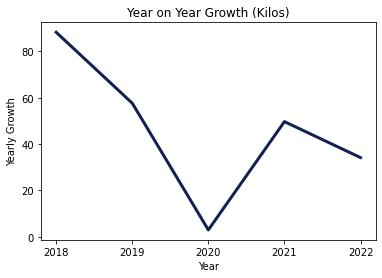

In [16]:
q_growth.plot(xlabel = "Year", ylabel = "Yearly Growth", color = "#141F52", title = "Year on Year Growth (Kilos)",
               xticks = [2018,2019,2020,2021,2022], linewidth= 3)

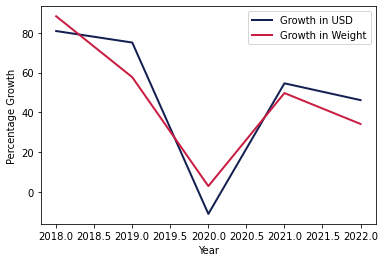

In [17]:
y1 = growth_cif.values
x1 = growth_cif.index 
y2 = q_growth.values 
x2 = q_growth.index
plt.plot(x1, y1, label = "Growth in USD", color = "#141F52", linewidth= 2 ) 
plt.plot(x1, y2, label = "Growth in Weight", color = "#C91D42", linewidth= 2 )
plt.xlabel("Year")
plt.ylabel("Percentage Growth")
plt.yticks([0,20,40,60,80])
#plt.xticks([2018,2019,2020,2021,2022])
plt.legend()

- Since 2021, beer imports measured in dollars have grown at a faster rate than beer imports measured in kilos. That is to say that since the pandemic, importing beer is getting more expensive.
- For example in 2022, imports in dollars have grown 46 percent, while imports in kilos went up by 34 percent. Everything else the same, we need to pay more for the same amount of beer.

### Freight Costs.

In [18]:
freight_per_year = year["shipping_price"].sum().round(2)
freight_per_year = freight_per_year.pct_change().round(2) * 100
freight_per_year

year
2017      NaN
2018     40.0
2019    148.0
2020    -23.0
2021    129.0
2022    163.0
Name: shipping_price, dtype: float64

- In 2021 and 2022, freight costs went up more than 120 percent, while imports in kilos went up by almost 40 percent. This is due to the supply chain issues during the pandemic. 
- These costs explain why is getting more expensive to import beer to Ecuador. As well why imports in USD grew more than imports in Kilos.

#### Evolution of Freight Costs:

In [19]:
freight_costs = year["shipping_price"].sum().round(2)
quantity = year["weight_kilos"].sum().round(2)

In [20]:
def shipping_inflation(year): 
    x = (freight_costs[2022] - freight_costs[year]) / freight_costs[year] * 100
    return x
#This functions gives back to you by how much freights costs have gone up in 2022 relative to other years. 

In [21]:
def quantity_growth(year): 
    y = (quantity[2022] - quantity[year]) / quantity[year] * 100
    return y
#This functions gives back to you by how much quantity imported has gone up in 2022 relative to other years. 

In [22]:
x = shipping_inflation(2019)
x

363.68707121882244

In [23]:
y = quantity_growth(2019)
y

106.68073505110496

- Since 2019, freight costs have gone up 363 percent. That is if we compared 2022 and 2019.
- Since 2019, the quantity of beer imported has gone up by 106 percent in the same period. 
- That is to say, shipping prices have gone up not because we are importing more. It has gone up because it is more expensive. 

In [24]:
dicto = {
    "Freight Costs" : x,
    "Quantity Imported" : y
}

evolution = pd.DataFrame(dicto, index = [""])

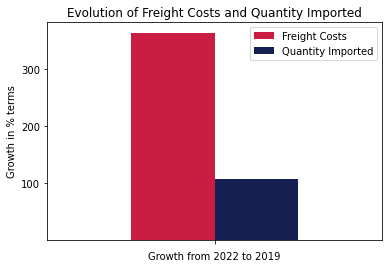

In [25]:
evolution.plot(kind = "bar", xlabel = "Growth from 2022 to 2019", ylabel = "Growth in % terms", color = ["#C91D42", "#141F52"], 
              title = "Evolution of Freight Costs and Quantity Imported", yticks = [100,200,300])
plt.savefig("freight.png", dpi=300, bbox_inches='tight')

### Which is leading company in beer importation?

In [26]:
companies = cheers.groupby(["year", "company"])
companies["cif"].sum().sort_values(ascending=False).round(2).loc[2022].head()

company
cerveceria nacional cn s.a.                            19938842.76
biela y bebidas del ecuador s.a. bielesa                1274611.99
distribuidora comercial del norte tricomnor s.a.        1103230.79
tiendas industriales asociadas tia s. a.                 505866.47
productos alimenticios y licores cia. ltda. proalco      189298.46
Name: cif, dtype: float64

In [27]:
y = companies["cif"].sum().sort_values(ascending=False).round(2).loc[2022].head()
y = y / 1000000
names = ["cervecería nacional", "bielesa", "tricomnor", "tia", "proalco"]
y.index = names

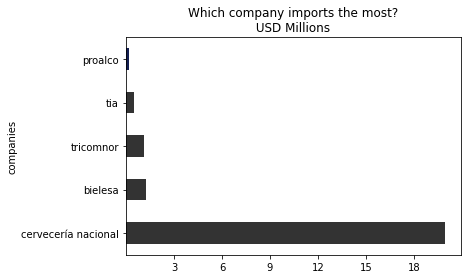

In [28]:
y.plot(kind = "barh", xlabel = "companies", ylabel = "Imports by Company (USD Millions)", color = ["#333333", "#333333", "#333333","#333333", "#141F52"], 
      title = "Which company imports the most?\n USD Millions ", xticks = [3,6,9,12,15,18])
plt.savefig("companies.png", dpi=300, bbox_inches='tight')

- Cervecería Nacional is by far the leading company. ($19 Millions USD of a total of 24 million for 2022.)

### Which beer do Ecuador imports the most?

In [29]:
to_ecu = cheers.groupby(["year", "brand"])

In [30]:
to_ecu["cif"].sum().sort_values(ascending = False).loc[2022].head().round(2)

brand
corona             10716284.32
budweiser           3456846.52
stella artois       2851111.51
modelo especial     2072751.90
sol                  829492.82
Name: cif, dtype: float64

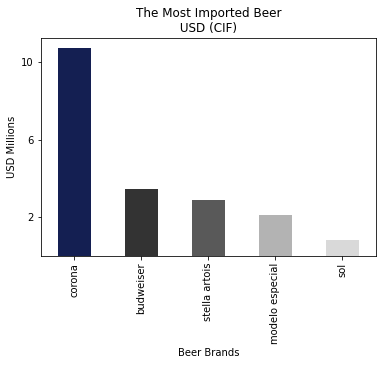

In [31]:
x = to_ecu["cif"].sum().sort_values(ascending = False).loc[2022].head().round(2) / 1000000
x.plot(kind = "bar", ylabel = "USD Millions", xlabel = "Beer Brands" , color = ["#141F52", "#333333", "#595959", "#B3B3B3", "#D9D9D9"],
      yticks = [2,6,10], title = "The Most Imported Beer\n USD (CIF) ")
plt.savefig("popularbeer.png", dpi=300, bbox_inches='tight')

- Corona is the most imported beer in Ecuador

### Where do beers come from?

In [32]:
x = cheers.groupby(["year", "country_origin"])
x["cif"].sum().sort_values(ascending=False).loc[2022].head().round()

country_origin
colombia          7984550.0
mexico            6761310.0
belgica           3446696.0
países bajos      1998995.0
estados unidos    1817541.0
Name: cif, dtype: float64

In [33]:
destination = x["cif"].sum().sort_values(ascending=False).loc[2022].head().round() / 1000000

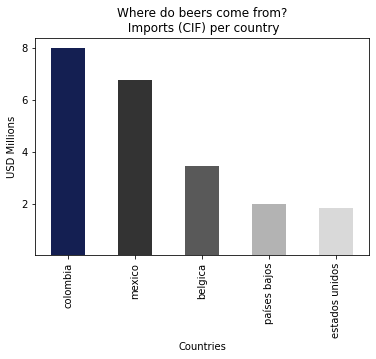

In [34]:
y = destination.plot(kind = "bar", title = "Where do beers come from?\n Imports (CIF) per country", ylabel = "USD Millions", xlabel = "Countries",
                yticks = [2,4,6,8], color = ["#141F52", "#333333", "#595959", "#B3B3B3", "#D9D9D9"] )
plt.savefig("country.png", dpi=300, bbox_inches='tight')

- In the first 8 months of 2022, beers come predominantly from Colombia and Mexico. That is because Corona is made in both countries. 